In [1]:
from matplotlib import pyplot as plt
from funciones import *
import numpy as np
import tqdm

from datetime import datetime
import pandas as pd
import seaborn

In [2]:
def casimir_fuerza(y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2).mean()
    return - delta_y2 / (8* (np.pi))

def casimir_error(y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2).std()
    return - delta_y2 / (8* (np.pi))


def casimir_error_porcentual(y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2)
    
    error_empirico = np.abs(delta_y2 / (8*np.pi) - np.pi / 24) / ( np.pi / 24 )
    
    return error_empirico.std()

F_teorica_a2 = -np.pi / (24)

In [3]:
divisiones_n_loops = 3
divisiones_N = 8

N = []
for val in np.logspace(2,4,divisiones_N):
    N.append([val]*divisiones_n_loops)
    
N = np.array(N).flatten()
n_lines = [100,1000,10000]*divisiones_N

In [41]:
results = []
errores = []

for n_lines_, N_ in tqdm.tqdm(zip(n_lines, N)):
    n_lines_ = int(n_lines_)
    N_ = int(N_)
    
    y = generar_lineas(n_lines =n_lines_, N = N_, y0 = 0, yN = 0)
    
    
    results.append((n_lines_, N_, casimir_fuerza(y),casimir_error(y), casimir_error_porcentual(y)))

results = np.array(results)

24it [00:24,  1.01s/it]


In [42]:
df = pd.DataFrame(results, columns = ('n_lines','N','val','std','desviacion error empirico'))
df['desviacion real'] = np.abs((df['val'] - F_teorica_a2) / F_teorica_a2)

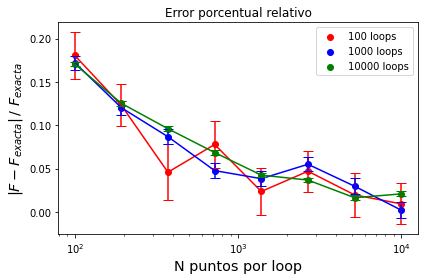

In [43]:
for n_loops,c  in zip([100,1000,10000],['r','b','g']):

    df_aux = df.loc[df['n_lines'] == n_loops]
    
    plt.plot(df_aux['N'], 
             df_aux['desviacion real'], 
#              label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.scatter(df_aux['N'], 
             df_aux['desviacion real'], 
             label = '{} loops'.format(n_loops), 
             c = c)
    
    
    plt.errorbar(df_aux['N'].values, 
                 df_aux['desviacion real'].values, 
                 yerr = df_aux['desviacion error empirico'] / df_aux['n_lines']**0.5, 
                 fmt = 'none',
                 c = c,
                capsize = 5)
    
plt.xscale('log')
# plt.yscale('log')

plt.legend(bbox_to_anchor=(1,1), loc="upper right")

plt.title('Error porcentual relativo')
plt.ylabel('$ | F - F _{exacta} | \, / \, \, F _{exacta} $', fontsize = 'x-large')
plt.xlabel('N puntos por loop', fontsize = 'x-large')


plt.tight_layout()

plt.savefig('convergencia porcentual.pdf')

TypeError: 'str' object is not callable

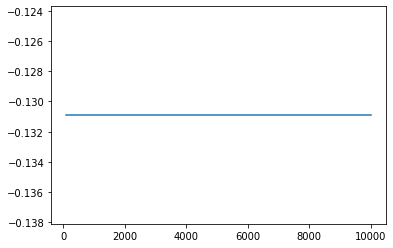

In [171]:
for n_loops,c  in zip([100,1000,10000],['r','b','g']):

    df_aux = df.loc[df['n_lines'] == n_loops]
    
    plt.plot(df_aux['N'], 
             df_aux['val'], 
#              label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.scatter(df_aux['N'], 
             df_aux['val'], 
             label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.errorbar(df_aux['N'].values, 
                 df_aux['val'].values, 
                 yerr = df_aux['std'] / df_aux['n_lines']**0.5, 
                 fmt = 'none',
                 c = c,
                capsize = 5)
    
plt.plot([100,10000],[-np.pi / 24,-np.pi / 24], label = '$ a ^2 \, F_{Exacto}$')
    
plt.xscale('log')

plt.legend(bbox_to_anchor=(1,1), loc="upper right")

plt.title('Fuerza de casimir exacta vs numérica')
plt.ylabel('$ a^2 \, F$', fontsize = 'x-large')
plt.xlabel('N puntos por loop', fontsize = 'x-large')

plt.tight_layout()

plt.savefig('convergencia.pdf')

# Hago una corrida con muchas lineas

In [141]:
results = []
errores = []

start = datetime.now()
n_lines_ = 100000

for  N_ in np.logspace(2,4,10):
    n_lines_ = int(n_lines_)
    N_ = int(N_)
    
    y = generar_lineas(n_lines =n_lines_, N = N_, y0 = 0, yN = 0)
    
    
    results.append((n_lines_, N_, casimir_fuerza(y),casimir_error(y), casimir_error_porcentual(y),
                   (datetime.now() - start).seconds))
                  
    
    print((datetime.now() - start).seconds)

results = np.array(results)

1
2
5
9
18
34
65
125
245
487


In [142]:
df = pd.DataFrame(results, columns = ('n_lines','N','val','std','desviacion error empirico','t'))
df['desviacion real'] = np.abs((df['val'] - F_teorica_a2) / F_teorica_a2)

In [178]:
# df.to_csv('results.csv', index =False)
# df = pd.read_csv('results.csv')

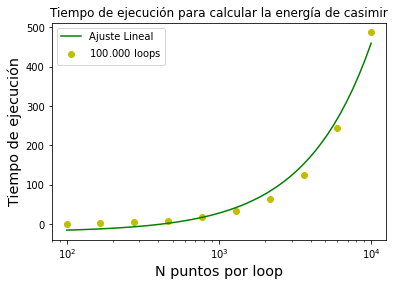

In [67]:
plt.scatter(df['N'].values, df['t'].values, c= 'y',label = '$100.000$ loops')
plt.plot(np.logspace(2,4), 0.04796222* np.logspace(2,4) -19.91344621, c = 'g', label = 'Ajuste Lineal')
plt.xscale('log')

plt.ylabel('Tiempo de ejecución', fontsize = 'x-large')
plt.xlabel('N puntos por loop', fontsize = 'x-large')

plt.title('Tiempo de ejecución para calcular la energía de casimir')
plt.legend()

plt.savefig('Tiempo de ejecución.pdf')

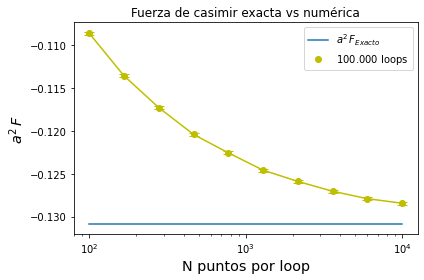

In [68]:
for n_loops,c  in zip([100000],['y']):

    df_aux = df.loc[df['n_lines'] == n_loops]
    
    plt.plot(df_aux['N'], 
             df_aux['val'], 
#              label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.scatter(df_aux['N'], 
             df_aux['val'], 
             label = '$100.000$ loops', 
             c = c)
    
    plt.errorbar(df_aux['N'].values, 
                 df_aux['val'].values, 
                 yerr = df_aux['std'] / df_aux['n_lines']**0.5, 
                 fmt = 'none',
                 c = c,
                capsize = 5)
    
plt.plot([100,10000],[-np.pi / 24,-np.pi / 24], label = '$ a ^2 \, F_{Exacto}$')
    
plt.xscale('log')

plt.legend(bbox_to_anchor=(1,1), loc="upper right")

plt.title('Fuerza de casimir exacta vs numérica')
plt.ylabel('$ a^2 \, F$', fontsize = 'x-large')
plt.xlabel('N puntos por loop', fontsize = 'x-large')

plt.tight_layout()

plt.savefig('convergencia.pdf')